# Experiment with Simple Convolutions

In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from scipy import signal

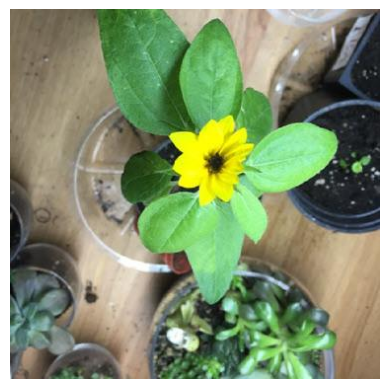

In [2]:
sun_flower = cv.imread("../data/sunflower.jpg")
sun_flower = cv.cvtColor(sun_flower, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(sun_flower)
plt.axis("off")
plt.show()

An RGB image has three channels. To perform convolutions, we need a two-dimensional matrix. We can extract all rows and columns of one of the channels using the colon (:) operator.

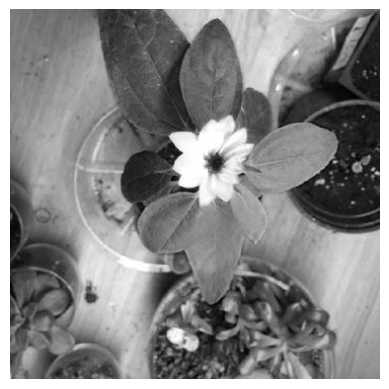

In [3]:
red_sun_flower = sun_flower[:, :, 0]

plt.figure()
plt.imshow(red_sun_flower, cmap='gray')
plt.axis("off")
plt.show()

We will be using a 3-by-3 matrix called a kernel to filter our image. One of the simplest kernels is the identity kernel. At every pixel, a convolution using the identity kernel will return the same pixel. The resulting image is therefore the same as the original.

In [4]:
identity_k = np.array([[0, 0, 0],
                       [0, 1, 0],
                       [0, 0, 0],])
identity_k

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

We can use our kernel with the [convolve2d()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html#scipy-signal-convolve2d) function to apply a filter to an image.

In [5]:
identity_conv = signal.convolve2d(red_sun_flower, identity_k)

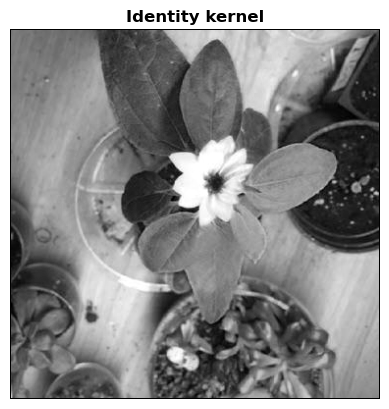

In [6]:
plt.figure()
plt.imshow(identity_conv, cmap='gray')
plt.title("Identity kernel")
plt.axis("off")
plt.show()

As expected, the image identity_conv is the same as red_sun_flower. Using different kernels will have a different effect on our image. We can use the following kernel to blur an image.

In [7]:
blur_k = 1/9 * np.ones((3, 3))
blur_k

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

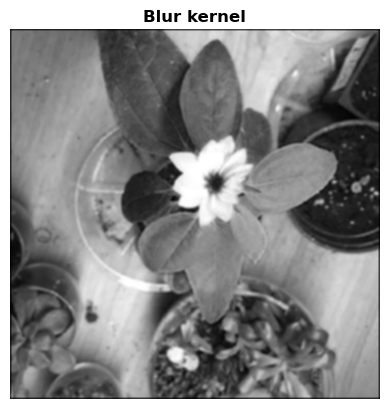

In [8]:
blur_conv = signal.convolve2d(red_sun_flower, blur_k)

plt.figure()
plt.imshow(blur_conv, cmap='gray')
plt.title("Blur kernel")
plt.axis("off")
plt.show()

Edges are often found as features in early layers of a CNN. We can peform simple edge detection with the following kernel.

In [9]:
edge_k = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])
edge_k

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

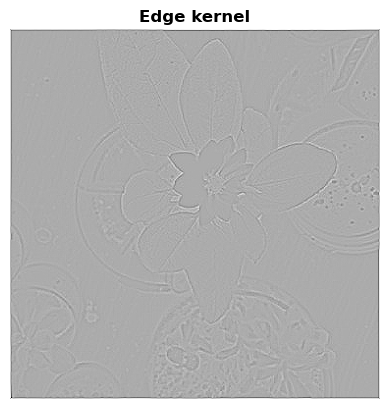

In [10]:
edge_conv = signal.convolve2d(red_sun_flower, edge_k)

plt.figure()
plt.imshow(edge_conv, cmap='gray')
plt.title("Edge kernel")
plt.axis("off")
plt.show()